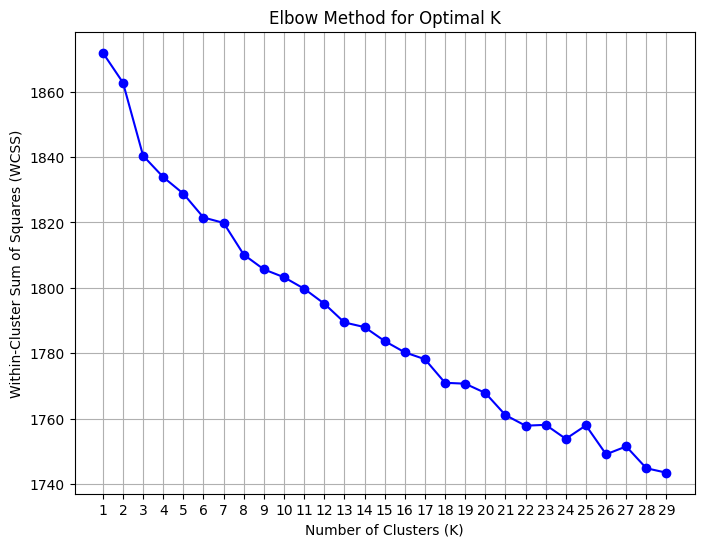

Probable optimal K: 22


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with actual path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Find optimal K using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_values = range(1, 30)  # Try K values from 1 to 15

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(text_vectors)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K
    
# Find optimal K: Last K before WCSS increases
optimal_k = k_values[-1]  # Default to the last K
for i in range(1, len(wcss) - 1):
    if wcss[i] > wcss[i - 1]:  # WCSS increased, take previous K
        optimal_k = k_values[i - 1]
        break

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid()
plt.show()

print(f"Probable optimal K: {optimal_k}")